# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 2. Data Sourcing

In [3]:
raw_data = pd.read_csv('train.csv')

In [4]:
raw_data.shape

(1460, 81)

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
raw_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#### Dropping Id Column as pandas will automatically assign Id to each row

In [7]:
raw_data = raw_data.drop(columns=['Id'])

# 3. Pre-Defined Graph Functions

#### Bar Plot

In [8]:
def plot_bar_graph_from_series(data, plot_title, x_axis_label, y_axis_label, x_axis_label_rotation=0, y_axis_label_rotation=0, data_label_rotation='vertical'):
    graph = sns.barplot(x=data.index, y=data.values)
    plt.title(plot_title, fontdict={'fontsize': 20})
    plt.xlabel(x_axis_label, fontdict={'fontsize': 15})
    plt.ylabel(y_axis_label, fontdict={'fontsize': 15})
    graph.set_xticklabels(graph.get_xticklabels(), rotation=x_axis_label_rotation)
    graph.set_yticklabels(graph.get_yticklabels(), rotation=y_axis_label_rotation)
    label_deviation_above_y_axis = data.max() * 0.015
    for index, value in enumerate(data.iteritems()):
        graph.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation=data_label_rotation)
    plt.show()

# 4. Data Cleaning

In [9]:
raw_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 4.1 Dwelling Type (MSSubClass)

#### Identifying Null Values 

In [10]:
raw_data.MSSubClass.isna().sum()

0

In [11]:
ms_sub_df = raw_data.MSSubClass.value_counts(sort=False)

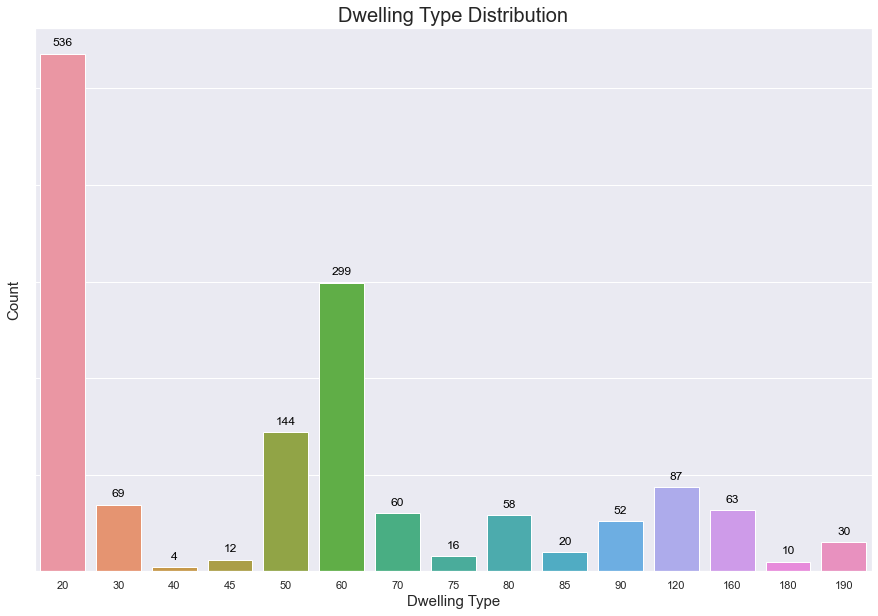

In [12]:
plot_bar_graph_from_series(data=ms_sub_df, plot_title='Dwelling Type Distribution', x_axis_label='Dwelling Type',
                           y_axis_label='Count', data_label_rotation='horizontal')

### 4.2 Zone Classification

In [13]:
raw_data.MSZoning.isna().sum()

0

In [14]:
ms_zone_df = raw_data.MSZoning.value_counts(sort=False)

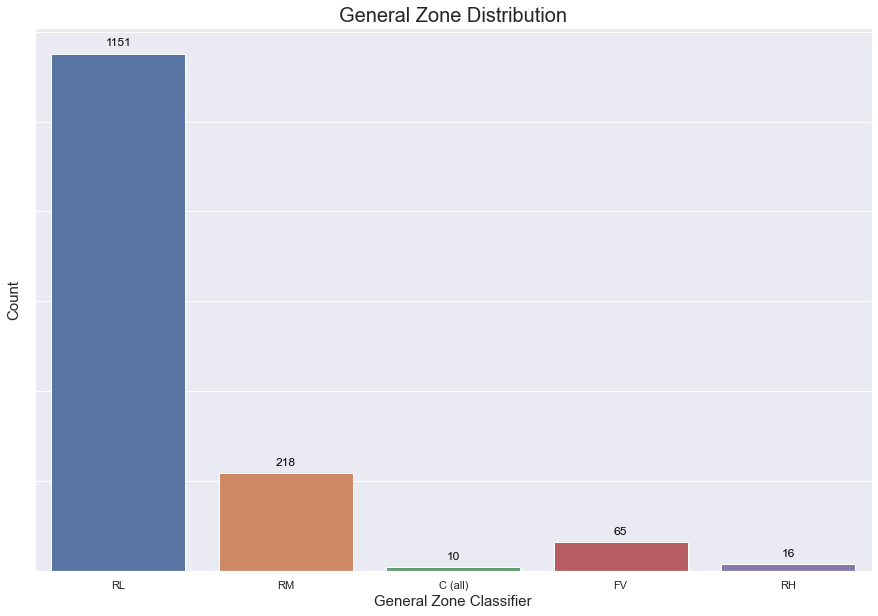

In [15]:
plot_bar_graph_from_series(data=ms_zone_df, plot_title='General Zone Distribution', x_axis_label='General Zone Classifier',
                           y_axis_label='Count', data_label_rotation='horizontal')

### 3.3 Lot Frontage (=========> Remaining <=========)

In [16]:
raw_data.LotFrontage.isna().sum()

259

### 3.4 Lot Area

In [17]:
raw_data.LotArea.isna().sum()

0

In [18]:
np.arange(0, 1.1, 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [19]:
raw_data.LotArea.describe(percentiles=np.arange(0, 1.1, 0.1))

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
0%         1300.000000
10%        5000.000000
20%        7078.400000
30%        8063.700000
40%        8793.400000
50%        9478.500000
60%       10198.200000
70%       11066.500000
80%       12205.800000
90%       14381.700000
100%     215245.000000
max      215245.000000
Name: LotArea, dtype: float64

In [21]:
raw_data.LotArea[raw_data.LotArea < raw_data.LotArea.quantile(0.99)].count()

1445

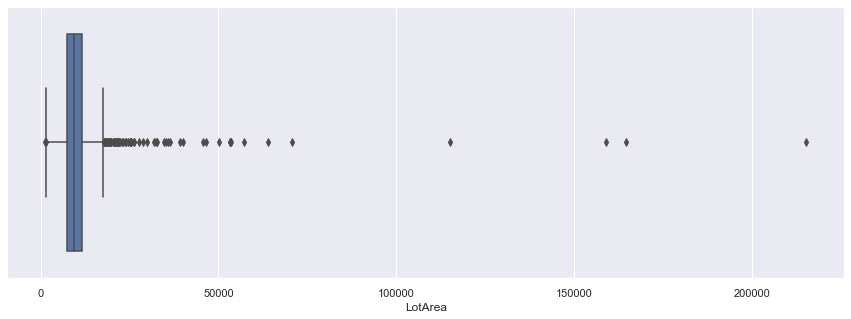

In [176]:
plt.figure(figsize=(15, 5))
sns.boxplot(raw_data.LotArea)
plt.show()

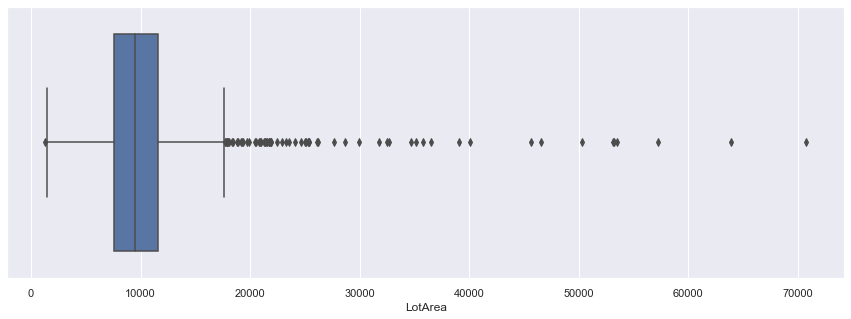

In [22]:
plt.figure(figsize=(15, 5))
sns.boxplot(raw_data.LotArea[raw_data.LotArea < 100000])
plt.show()

### 3.5 Street

In [25]:
street_df = raw_data.Street.value_counts(sort=False)
street_df

Grvl       6
Pave    1454
Name: Street, dtype: int64

In [26]:
raw_data.Street = raw_data.Street.map({'Grvl': 0, 'Pave': 1})

In [27]:
raw_data.Street.value_counts(sort=False)

0       6
1    1454
Name: Street, dtype: int64

### 3.6 Alley

In [28]:
alley_df = raw_data.Alley.value_counts(sort=False)
alley_df

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [32]:
round(raw_data.Alley.isna().sum() / len(raw_data.Alley) * 100, 2)

93.77

#### More than 90% of value are missing. We shall be dropping this column.

In [34]:
raw_data = raw_data.drop(columns=['Alley'])

### 3.7 Lot Shape

In [38]:
lot_shape_df = raw_data.LotShape.value_counts(sort=False)
lot_shape_df

IR3     10
Reg    925
IR2     41
IR1    484
Name: LotShape, dtype: int64

In [39]:
raw_data.LotShape = raw_data.LotShape.map({'IR3': 0, 'IR2': 1, 'IR1': 2, 'Reg': 3})

In [40]:
raw_data.LotShape.value_counts(sort=False)

0     10
1     41
2    484
3    925
Name: LotShape, dtype: int64

### 3.8 Land Contour

In [42]:
land_cont_df = raw_data.LandContour.value_counts(sort=False)
land_cont_df

HLS      50
Bnk      63
Lvl    1311
Low      36
Name: LandContour, dtype: int64

In [43]:
raw_data.LandContour = raw_data.LandContour.map({'Low': 0, 'HLS': 1, 'Bnk': 2, 'Lvl': 3})

In [44]:
raw_data.LandContour.value_counts(sort=False)

0      36
1      50
2      63
3    1311
Name: LandContour, dtype: int64

### 3.9 Utiltities

In [49]:
utility_df = raw_data.Utilities.value_counts(sort=False)
utility_df

NoSeWa       1
AllPub    1459
Name: Utilities, dtype: int64

In [50]:
raw_data.Utilities = raw_data.Utilities.map({'ELO': 0, 'NoSeWa': 1, 'NoSewr': 2, 'AllPub': 3})

In [51]:
raw_data.Utilities.value_counts(sort=False)

1       1
3    1459
Name: Utilities, dtype: int64

### 3.10 Lot Configuration

In [52]:
lot_config_df = raw_data.LotConfig.value_counts(sort=False)
lot_config_df

FR2          47
Corner      263
Inside     1052
CulDSac      94
FR3           4
Name: LotConfig, dtype: int64

### 3.11 Land Slope

In [54]:
land_slope_df = raw_data.LandSlope.value_counts(sort=False)
land_slope_df

Mod      65
Gtl    1382
Sev      13
Name: LandSlope, dtype: int64

In [56]:
raw_data.LandSlope = raw_data.LandSlope.map({'Sev': 0, 'Mod': 1, 'Gtl': 2})

In [58]:
raw_data.LandSlope.value_counts(sort=False)

0      13
1      65
2    1382
Name: LandSlope, dtype: int64

### 3.12 Neighbourhood

In [59]:
neighbourhood_df = raw_data.Neighborhood.value_counts(sort=False)
neighbourhood_df

NPkVill      9
IDOTRR      37
SawyerW     59
BrkSide     58
CollgCr    150
StoneBr     25
OldTown    113
Gilbert     79
Blmngtn     17
MeadowV     17
NridgHt     77
Edwards    100
NoRidge     41
ClearCr     28
NAmes      225
Somerst     86
Blueste      2
Veenker     11
BrDale      16
Crawfor     51
Timber      38
Sawyer      74
SWISU       25
Mitchel     49
NWAmes      73
Name: Neighborhood, dtype: int64